In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  #设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号

pd.set_option('display.float_format',lambda x : '%.2f' % x)#pandas禁用科学计数法

#忽略警告
import warnings
warnings.filterwarnings('ignore')

## 1 加载数据 

In [6]:
data = pd.read_csv('data_clean.csv')

In [7]:
data.head()

,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,date,month,weekday,buy_cnt,amount
0,2318945879811162983,2309018204833317816,2268105479144079872,M,compliment,0.56,1515915625465863936,28.00,女,浙江,2020-05-28,5,4,4,2.24
1,2295740594749702229,1515966223509104892,2268105428166508800,electronics.smartphone,apple,1387.01,1515915625448766464,21.00,男,北京,2020-04-26,4,0,4,5548.04
2,2388440981134674698,1515966223509106757,2360741867017995776,appliances.environment.air_conditioner,samsung,366.41,1515915625514599680,50.00,男,广东,2020-11-16,11,1,4,1465.64
3,2375043331555066740,2273948308370096764,2268105409048871168,computers.network.router,altel,57.85,1515915625504379136,19.00,女,上海,2020-08-13,8,4,4,231.40
4,2334999887038383089,1515966223509090031,2268105402673529600,M,vitek,18.50,1515915625447765248,18.00,男,广东,2020-06-19,6,5,3,55.50


In [8]:
data.shape

(535065, 15)

In [9]:
data.user_id.nunique()

92755

共有92755名用户信息

## 2 基础维度分析 

#### 2.1 地域维度 

In [11]:
local = data.groupby('local')['user_id'].nunique().reset_index()
local = local.rename(columns={'user_id':'用户数量'})
local = local.sort_values('用户数量').reset_index(drop=True)

In [12]:
local

,local,用户数量
0,湖南,5330
1,天津,5337
2,重庆,5342
3,湖北,5355
4,浙江,5370
5,四川,5445
6,海南,5449
7,江苏,5561
8,北京,15928
9,上海,16031


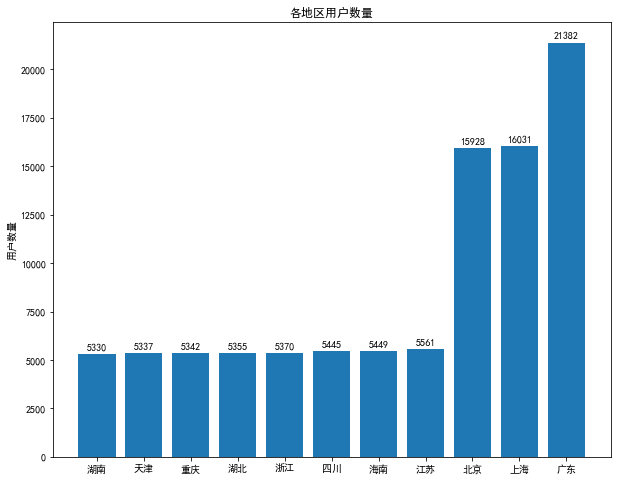

In [10]:
plt.figure(figsize=(10,8))
plt.ylabel('用户数量')
plt.title('各地区用户数量')
plt.bar(local['local'],local['用户数量'])
for x,y in enumerate(local['用户数量']):
    plt.text(x,y+200,y,ha='center')
plt.show()

广东的用户数量是最多的，然后就是上海和北京，其他八个城市用户数比较平均，都在5400左右。

#### 2.2 性别维度

#### 2.2.1 性别分布 

In [14]:
sex =  data.groupby('sex')['user_id'].nunique().reset_index()
sex.rename(columns={'user_id':'用户数量'},inplace=True)
sex

,sex,用户数量
0,女,47235
1,男,47628


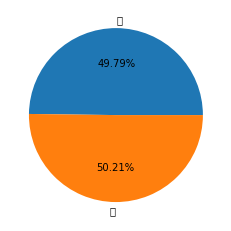

In [17]:
plt.pie(sex['用户数量'],labels=sex['sex'],autopct='%1.2f%%')
plt.show()

从性别维度来看，男女性分布较为平均

#### 2.2.2 不同性别消费差异 

In [35]:
#比较不同性别下的消费金额与下单次数均值

In [37]:
sex_data = data.groupby('sex').agg(消费金额=('amount','sum'),下单次数=('order_id','nunique'))
sex_data

,消费金额,下单次数
sex,,
女,57055489.23,192394
男,57825840.84,196348


发现男性女性的消费金额与下单次数比较平均

#### 2.3 年龄维度 

#### 2.3.1 年龄分布 

In [19]:
age = data.groupby('age')['user_id'].nunique().reset_index()
age.rename(columns={'user_id':'用户数量'},inplace=True)

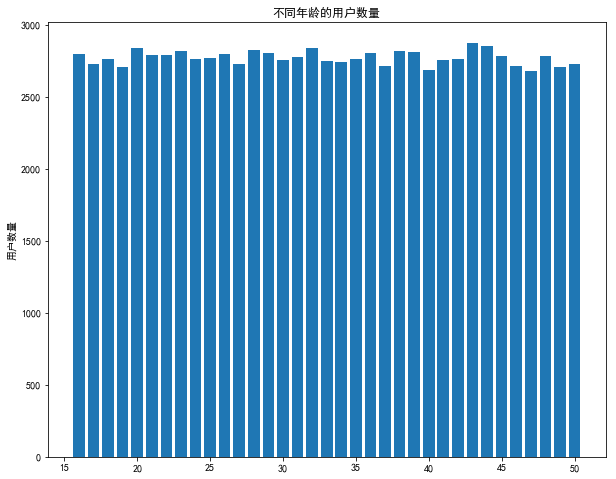

In [27]:
plt.figure(figsize=(10,8))
plt.ylabel('用户数量')
plt.title('不同年龄的用户数量')
plt.bar(age['age'],age['用户数量'])

plt.show()

对年龄维度绘制条形图发现年龄分布还是比较均匀的，但是由于年龄过多，导致无法看清楚数据，考虑对年龄进行分箱

In [28]:
#先看一下年龄维度的极值

In [29]:
data.age.min()

16.0

In [30]:
data.age.max()

50.0

In [31]:
#对年龄进行分箱处理

In [20]:
bins = [15,20,25,30,35,40,45,50]
labels = ['(15-20]岁','(20-25]岁','(25-30]岁','(30-35]岁','(35-40]岁','(40-45]岁','(45-50]岁']
data_age = data.copy()
data_age['age_bin'] = pd.cut(x=data.age,bins=bins,right=True,labels=labels)

In [21]:
age = data_age.groupby('age_bin')['user_id'].nunique().reset_index()
age.rename(columns={'user_id':'用户数量'},inplace=True)
age

,age_bin,用户数量
0,(15-20]岁,13726
1,(20-25]岁,13867
2,(25-30]岁,13831
3,(30-35]岁,13802
4,(35-40]岁,13775
5,(40-45]岁,13969
6,(45-50]岁,13535


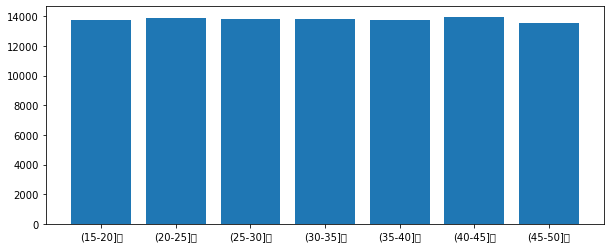

In [22]:
plt.figure(figsize=(10,4))
plt.bar(age['age_bin'],age['用户数量'])
plt.show()

各个年龄段的人数分布比较平均

#### 2.3.2 不同年龄消费差异 

In [24]:
age_bin_data = data_age.groupby('age_bin').agg(消费金额=('amount','sum'),下单次数=('order_id','nunique'))
age_bin_data

,消费金额,下单次数
age_bin,,
(15-20]岁,16007287.18,54302
(20-25]岁,16500743.70,55546
(25-30]岁,16513446.00,54723
(30-35]岁,17004578.70,58275
(35-40]岁,14995577.44,49744
(40-45]岁,17078724.54,59067
(45-50]岁,16886278.32,57085


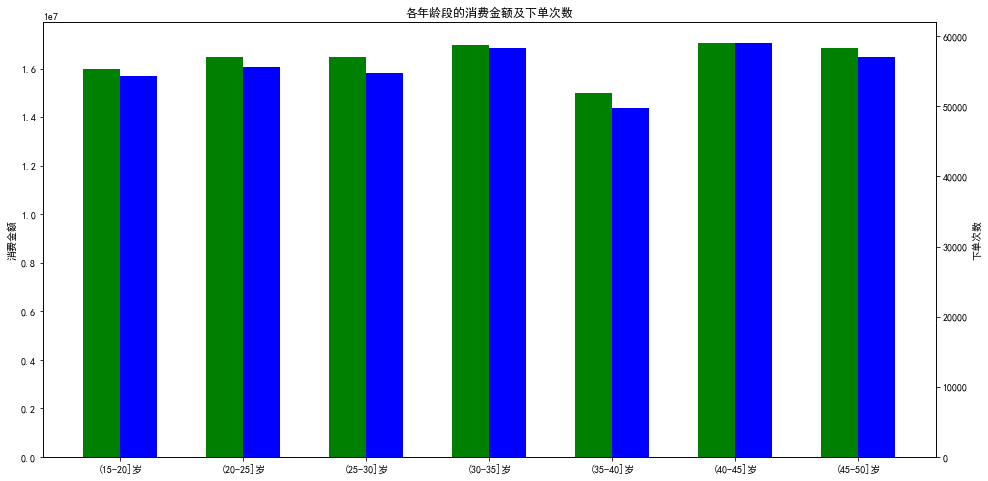

In [43]:
fig,ax1 = plt.subplots(figsize=(16,8))
xticks = np.arange(len(age_bin_data.index))

ax1.bar(xticks,age_bin_data.消费金额,width=0.3,color='g')
ax1.set_ylabel('消费金额')
ax2 = ax1.twinx()

ax2.bar(xticks+0.3,age_bin_data.下单次数,width=0.3,color='b')
ax2.set_ylabel('下单次数')
plt.title('各年龄段的消费金额及下单次数')

ax1.set_xticks(xticks+0.15)
ax1.set_xticklabels(age_bin_data.index)
plt.show()

发现35-40岁的用户贡献的消费金额和订单数量都是最低的，其他年龄段比较平均

#### 2.4 购买0元商品用户 

还记得我们前面留了个0元商品的彩蛋吗，这里重点关注一下购买0元商品的这群用户的表现~

In [44]:
data[data['price']==0]

,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,date,month,weekday,buy_cnt,amount
48806,2354499489466679644,1515966223509117182,2268105424962060288,electronics.smartphone,sony,0.00,1515915625449238016,21.00,男,天津,2020-04-24,4,5,1,0.00
140670,2348779162900103916,2309018259719979217,2268105427872908032,M,xiaomi,0.00,1515915625484629760,33.00,女,海南,2020-01-25,1,6,1,0.00
146289,2348769908982022577,2309018259719979217,2268105427872908032,M,xiaomi,0.00,1515915625484619520,35.00,女,江苏,2020-01-10,1,5,1,0.00
150371,2348798941820092785,1515966223509118512,2268105424962060288,electronics.smartphone,sony,0.00,1515915625484641280,45.00,男,广东,2020-02-20,2,4,1,0.00
151252,2348799560932918101,2309018259719979217,2268105427872908032,M,xiaomi,0.00,1515915625484627200,36.00,男,北京,2020-02-20,2,4,1,0.00
157940,2348801959043007423,1515966223509117560,2268105424962060288,electronics.smartphone,sony,0.00,1515915625484652288,41.00,女,海南,2020-02-23,2,0,1,0.00
158246,2348802240422084738,2309018259719979217,2268105427872908032,M,xiaomi,0.00,1515915625484648960,44.00,男,上海,2020-02-23,2,0,1,0.00
163215,2348791961667764924,2309018259719979217,2268105427872908032,M,xiaomi,0.00,1515915625446572032,43.00,男,四川,2020-02-10,2,1,1,0.00
194988,2323108762694451619,1515966223509132095,2268105407220155904,computers.notebook,hp,0.00,1515915625468531712,38.00,男,湖北,2020-06-03,6,3,1,0.00
214967,2353232124972106231,2309018259719979217,2268105427872908032,M,xiaomi,0.00,1515915625446041088,31.00,女,上海,2020-05-24,5,0,1,0.00


大多商品是我们前面标记为M的商品品类，盲猜是中奖或者赠品才导致的价格为0元~

In [45]:
#把这批用户提取出来

In [46]:
user_0 = data[data['price']==0]['user_id'].reset_index(drop=True)

In [47]:
user_0.shape

(30,)

In [49]:
#看一下这30个用户是否有过消费记录

In [50]:
user_0[~user_0.isin(data[data['price']>0]['user_id'])]

8    1515915625468531712
Name: user_id, dtype: int64

30个中奖的用户中,只有一个用户没有产生消费

## 4 用户分层 

### 4.1 用户生命周期分层 

注：由于数据有限，这里生命周期仅仅用每个月的新用户、活跃用户、不活跃用户和回流用户来简单替代

逻辑：
①找到用户记录的第一个月，为该用户的注册月，在该月之前该用户都是“未注册”的状态，在该月该用户为新用户；
②用户注册之后，根据每个月的消费记录用户在该月是否活跃；
③如果用户在注册之后有段时间不活跃，但是之后又活跃则为回流用户；

In [25]:
pivoted_amount =data[data['amount']>0].pivot_table(index='user_id'
                                             ,columns='month'
                                             ,values='buy_cnt'
                                             ,aggfunc='sum').fillna(0)
columns_month = pivoted_amount.columns.astype('str')  #一定要把列名格式变为str不然后面就会报错
pivoted_amount.columns = columns_month
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)

In [26]:
def active_status(data):
    status =[]
    for i in range(11):
        #若本月没有消费
        if data[i] ==0:
            if len(status)>0:  #如果不是第一个月,
                if status[i-1]=='未注册': #如果上个月已经是未注册,那么本月也是未注册
                    status.append('未注册') 
                else:  #如果上月已注册,则本月为不活跃
                    status.append('不活跃')
            else:  #如果是第一个月
                status.append('未注册') #则未注册
        #若本月消费
        else:
            if len(status)==0: #如果是第一个月,则为新注册用户
                status.append('新客户')
            else:  #如果不是第一个月
                if status[i-1]=='不活跃':  #如果上月为不活跃,那么本月为回流
                    status.append('回流')
                elif status[i-1]=='未注册':  #如果上月为未注册,那么本月为新注册
                    status.append('新客户')
                else:  #如果上月为活跃,本月也为活跃
                    status.append('活跃')
    return pd.Series(status,index=columns_month)

In [27]:
pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status.head()

month,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1515915625439951872,未注册,未注册,未注册,未注册,未注册,未注册,新客户,不活跃,不活跃,不活跃,不活跃
1515915625440038400,未注册,未注册,未注册,未注册,未注册,未注册,未注册,未注册,新客户,活跃,不活跃
1515915625440051712,未注册,未注册,未注册,未注册,未注册,未注册,未注册,未注册,未注册,新客户,活跃
1515915625440099840,未注册,未注册,未注册,未注册,新客户,活跃,活跃,不活跃,回流,活跃,活跃
1515915625440121600,未注册,未注册,未注册,未注册,新客户,不活跃,回流,不活跃,不活跃,不活跃,不活跃


In [28]:
purchase_cnt = pivoted_purchase_status.apply(lambda x:x.value_counts())
#去除未注册的数据行
purchase_cnt = purchase_cnt[purchase_cnt.index != '未注册']
purchase_cnt = purchase_cnt.fillna(0)
#排序 可排可不排
purchase_cnt = purchase_cnt.loc[['新客户','回流','活跃','不活跃'],:]
purchase_cnt

month,1,2,3,4,5,6,7,8,9,10,11
新客户,1813.00,1613.00,1491,4177,13914,8950,22036,22052,8163,5607,2938.00
回流,0.00,0.00,261,432,1377,1251,3462,4244,4199,3740,2444.00
活跃,0.00,623.00,819,800,1865,3639,4309,8765,7182,4941,3116.00
不活跃,0.00,1190.00,2346,3685,5852,18118,24187,40985,64665,75528,84256.00


<AxesSubplot:xlabel='month'>

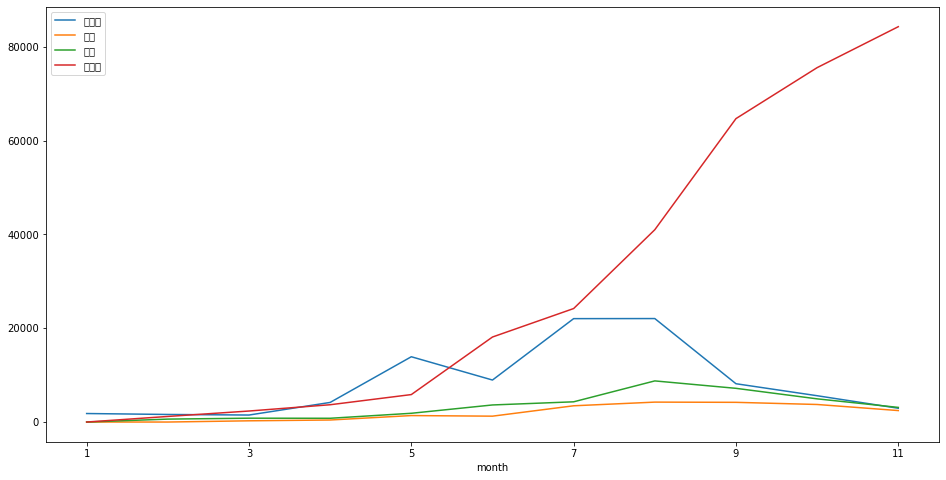

In [29]:
purchase_cnt.T.plot(figsize=(16,8))

由于电子产品的特性，大多用户在购买一次之后呈现“不活跃”状态

### 3.2 帕累托分析 

27%的用户贡献了80%的销售收入，符合二八法则，因此对于运营团队而言，需要对这27%的用户重点运营

In [30]:
#查询每个用户的消费金额及累计消费金额

In [31]:
user_28 = data.groupby('user_id').agg(消费金额=('amount','sum')).sort_values('消费金额',ascending=False).reset_index()
user_28['累计销售额'] = user_28['消费金额'].cumsum()
user_28

,user_id,消费金额,累计销售额
0,1515915625512422912,160604.07,160604.07
1,1515915625513695488,158277.37,318881.44
2,1515915625512377088,149967.06,468848.50
3,1515915625513577472,135672.84,604521.34
4,1515915625514597888,133945.88,738467.22
...,...,...,...
92750,1515915625511079936,0.02,114986635.82
92751,1515915625450548736,0.02,114986635.84
92752,1515915625506653440,0.02,114986635.86
92753,1515915625451367168,0.02,114986635.88


In [32]:
p = user_28['消费金额'].cumsum()/user_28['消费金额'].sum()  # 创建累计占比，Series
key = p[p>0.8].index[0] 
key

25408

In [33]:
key / user_28.shape[0]

0.2739259339119185

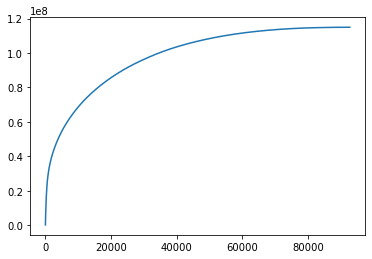

In [34]:
plt.plot(user_28.index,user_28['累计销售额'])
plt.show()

### 3.3 RFM用户分层 

回忆一下RFM用户分层的定义：

R(Recency)：最近一次消费；
F(Frequency)：消费频率；
M(Monetary)：消费金额；

#### 计算每个用户的RFM值 

In [35]:
#先计算M

In [36]:
user_rfm = data.groupby(['user_id','date']).agg(消费金额=('amount','sum')).reset_index()
user_rfm.head()

,user_id,date,消费金额
0,1515915625439951872,2020-07-09,416.64
1,1515915625440038400,2020-09-22,21.04
2,1515915625440038400,2020-10-28,35.39
3,1515915625440051712,2020-10-23,972.16
4,1515915625440051712,2020-11-16,6517.37


In [37]:
#然后计算F

In [38]:
user_rfm = user_rfm.groupby('user_id').agg(最后购买日期=('date','max')
                                           ,M=('消费金额','sum')
                                           ,F=('date','count')
                                          ).reset_index()
user_rfm

,user_id,最后购买日期,M,F
0,1515915625439951872,2020-07-09,416.64,1
1,1515915625440038400,2020-10-28,56.43,2
2,1515915625440051712,2020-11-16,7489.53,2
3,1515915625440099840,2020-11-08,4929.86,12
4,1515915625440121600,2020-07-14,182.83,2
...,...,...,...,...
92750,1515915625514887424,2020-11-21,208.31,1
92751,1515915625514887936,2020-11-21,3472.20,1
92752,1515915625514888704,2020-11-21,752.49,1
92753,1515915625514891008,2020-11-21,925.67,1


In [39]:
#然后计算R

In [40]:
user_rfm['最后购买日期'] = pd.to_datetime(user_rfm['最后购买日期'])
user_rfm['R'] = user_rfm['最后购买日期'].apply(lambda x:user_rfm['最后购买日期'].max() - x)
user_rfm['R'] = user_rfm['R'].dt.days
user_rfm = user_rfm[['user_id','R','F','M']]

In [41]:
user_rfm

,user_id,R,F,M
0,1515915625439951872,135,1,416.64
1,1515915625440038400,24,2,56.43
2,1515915625440051712,5,2,7489.53
3,1515915625440099840,13,12,4929.86
4,1515915625440121600,130,2,182.83
...,...,...,...,...
92750,1515915625514887424,0,1,208.31
92751,1515915625514887936,0,1,3472.20
92752,1515915625514888704,0,1,752.49
92753,1515915625514891008,0,1,925.67


#### 查看RFM的分布情况 

In [42]:
user_rfm['user_id'] = user_rfm['user_id'].astype('object')
user_rfm.describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.95,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
R,92755.00,98.59,54.53,0.00,2.00,24.00,61.00,101.00,127.00,180.00,196.00,211.00,321.00
F,92755.00,2.51,4.56,1.00,1.00,1.00,1.00,1.00,3.00,4.00,6.00,17.00,159.00
M,92755.00,1239.68,4129.72,0.00,6.00,41.64,148.11,456.89,1141.17,2402.53,3823.67,12744.87,160604.07


#### 根据分布对RFM分别打分 

In [43]:
rfm_score = user_rfm.copy()

In [44]:
for i,j in enumerate(rfm_score['R']):
    if j <= 30:
        rfm_score['R'][i] = 5
    elif j <= 60:
        rfm_score['R'][i] = 4
    elif j <= 90:
        rfm_score['R'][i] = 3
    elif j <= 120:
        rfm_score['R'][i] = 2
    else :
        rfm_score['R'][i] = 1

In [45]:
for i,j in enumerate(rfm_score['F']):
    if j <= 1:
        rfm_score['F'][i] = 1
    elif j <= 2:
        rfm_score['F'][i] = 2
    elif j <= 3:
        rfm_score['F'][i] = 3
    elif j <= 4:
        rfm_score['F'][i] = 4
    else :
        rfm_score['F'][i] = 5

In [46]:
for i,j in enumerate(rfm_score['M']):
    if j <= 200:
        rfm_score['M'][i] = 1
    elif j <= 500:
        rfm_score['M'][i] = 2
    elif j <= 1000:
        rfm_score['M'][i] = 3
    elif j <= 2000:
        rfm_score['M'][i] = 4
    else :
        rfm_score['M'][i] = 5

In [79]:
rfm_score

,user_id,R,F,M
0,1515915625439951872,1,1,2.00
1,1515915625440038400,5,2,1.00
2,1515915625440051712,5,2,5.00
3,1515915625440099840,5,5,5.00
4,1515915625440121600,1,2,1.00
...,...,...,...,...
92750,1515915625514887424,5,1,2.00
92751,1515915625514887936,5,1,5.00
92752,1515915625514888704,5,1,3.00
92753,1515915625514891008,5,1,3.00


#### 计算RFM打分后的均值，然后判断RFM是0或是1 

In [47]:
rfm_score['R'].mean()

2.498830251738451

In [48]:
rfm_score['F'].mean()

1.996366772680718

In [49]:
rfm_score['M'].mean()

2.581930893213304

In [50]:
rfm = pd.DataFrame()
rfm['user_id'] = rfm_score['user_id']
rfm['R'] = rfm_score['R'].apply(lambda x: '1' if x >= rfm_score['R'].mean() else '0')
rfm['F'] = rfm_score['F'].apply(lambda x: '1' if x >= rfm_score['F'].mean() else '0')
rfm['M'] = rfm_score['M'].apply(lambda x: '1' if x >= rfm_score['M'].mean() else '0')

In [84]:
rfm

,user_id,R,F,M
0,1515915625439951872,0,0,0
1,1515915625440038400,1,1,0
2,1515915625440051712,1,1,1
3,1515915625440099840,1,1,1
4,1515915625440121600,0,1,0
...,...,...,...,...
92750,1515915625514887424,1,0,0
92751,1515915625514887936,1,0,1
92752,1515915625514888704,1,0,1
92753,1515915625514891008,1,0,1


In [85]:
rfm['result'] = rfm['R'] + rfm['F'] + rfm['M']
rfm

,user_id,R,F,M,result
0,1515915625439951872,0,0,0,000
1,1515915625440038400,1,1,0,110
2,1515915625440051712,1,1,1,111
3,1515915625440099840,1,1,1,111
4,1515915625440121600,0,1,0,010
...,...,...,...,...,...
92750,1515915625514887424,1,0,0,100
92751,1515915625514887936,1,0,1,101
92752,1515915625514888704,1,0,1,101
92753,1515915625514891008,1,0,1,101


#### 根据结果对用户进行分层 

In [86]:
for i,j in enumerate(rfm['result']):
    if j == '111':
        rfm['result'][i] = '重要价值客户'
    elif j == '101':
        rfm['result'][i] = '重要发展客户'
    elif j == '011':
        rfm['result'][i] = '重要保持客户'
    elif j == '001':
        rfm['result'][i] = '重要挽留客户'
    elif j == '110':
        rfm['result'][i] = '一般价值客户'
    elif j == '100':
        rfm['result'][i] = '一般发展客户'
    elif j == '010':
        rfm['result'][i] = '一般保持客户'
    elif j == '000':
        rfm['result'][i] = '一般挽留客户'

In [87]:
rfm

,user_id,R,F,M,result
0,1515915625439951872,0,0,0,一般挽留客户
1,1515915625440038400,1,1,0,一般价值客户
2,1515915625440051712,1,1,1,重要价值客户
3,1515915625440099840,1,1,1,重要价值客户
4,1515915625440121600,0,1,0,一般保持客户
...,...,...,...,...,...
92750,1515915625514887424,1,0,0,一般发展客户
92751,1515915625514887936,1,0,1,重要发展客户
92752,1515915625514888704,1,0,1,重要发展客户
92753,1515915625514891008,1,0,1,重要发展客户


In [88]:
rfm['result'].value_counts()

一般挽留客户    26852
重要价值客户    20008
重要保持客户    11359
一般发展客户     8514
重要挽留客户     8325
一般保持客户     7425
一般价值客户     5859
重要发展客户     4413
Name: result, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

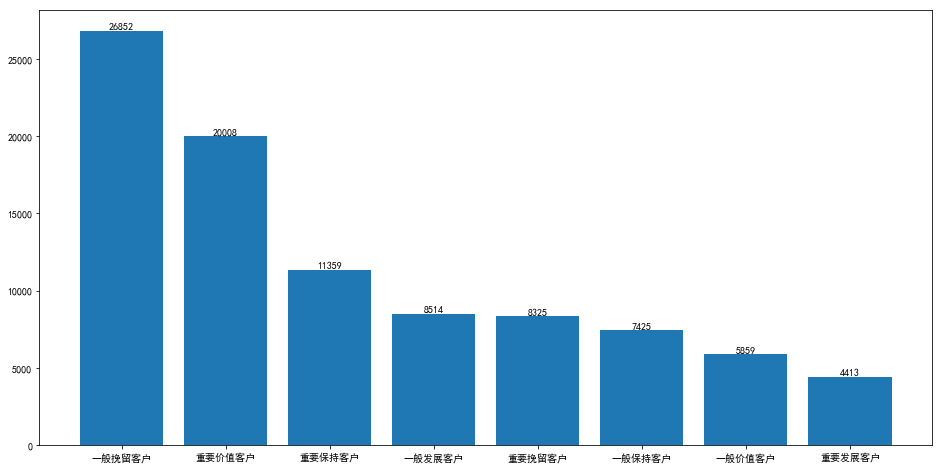

In [89]:
plt.figure(figsize=(16,8))
plt.bar(rfm['result'].value_counts().index,rfm['result'].value_counts().values)
for x,y in enumerate(rfm['result'].value_counts()):
    plt.text(x,y+100,y,ha='center')
plt.show